In [44]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import pandas as pd
%matplotlib inline


epf = 0.0000001
threshold = 0.00001
#area of bounds= 10.24*10.24
#threshold

In [45]:
# TO CUSTOMIZE THIS PSO CODE TO SOLVE UNCONSTRAINED OPTIMIZATION PROBLEMS, CHANGE THE PARAMETERS IN THIS SECTION ONLY:
# THE FOLLOWING PARAMETERS MUST BE CHANGED.
def objective_function(X):
    A = 10
    y = A*2 + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])
    return y
 
bounds = [(-5.12, 5.12), (-5.12, 5.12)]  # upper and lower bounds of variables
nv = 2  # number of variables
mm = -1  # if minimization problem, mm = -1; if maximization problem, mm = 1
 
# THE FOLLOWING PARAMETERS ARE OPTIONAL
particle_size = 100  # number of particles
iterations = 100  # max number of iterations
w = 0.75  # inertia constant
c1 = 1  # cognative constant
c2 = 2  # social constant
# END OF THE CUSTOMIZATION SECTION

#------------------------------------------------------------------------------------------
#Parameters for Z by arham
n=particle_size
a=2 #degree of alternate-ness

total_planes = n + n//a
free_planes = n//a
occupied_planes = n

drone_index=0
plane_height=0
planes=[]
for j in range(n):
    for k in range(a-1):
         planes.append([False,[],plane_height+0.1])
    planes.append([True,[drone_index],plane_height])
    drone_index=drone_index+1
    plane_height=plane_height+0.2
    
print(planes)
    
#--------------------------------------------------------------------------------------------
# Zobjective by arham
def z_objective_function(X,particle_index,planes):
    for plane in planes:
        if particle_index in plane[1]:
            A = 10
            z = A*2 + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])+plane[2] 
            return (z,plane)    
     


[[False, [], 0.1], [True, [0], 0], [False, [], 0.30000000000000004], [True, [1], 0.2], [False, [], 0.5], [True, [2], 0.4], [False, [], 0.7000000000000001], [True, [3], 0.6000000000000001], [False, [], 0.9], [True, [4], 0.8], [False, [], 1.1], [True, [5], 1.0], [False, [], 1.3], [True, [6], 1.2], [False, [], 1.5], [True, [7], 1.4], [False, [], 1.7], [True, [8], 1.5999999999999999], [False, [], 1.9], [True, [9], 1.7999999999999998], [False, [], 2.0999999999999996], [True, [10], 1.9999999999999998], [False, [], 2.3], [True, [11], 2.1999999999999997], [False, [], 2.5], [True, [12], 2.4], [False, [], 2.7], [True, [13], 2.6], [False, [], 2.9000000000000004], [True, [14], 2.8000000000000003], [False, [], 3.1000000000000005], [True, [15], 3.0000000000000004], [False, [], 3.3000000000000007], [True, [16], 3.2000000000000006], [False, [], 3.500000000000001], [True, [17], 3.400000000000001], [False, [], 3.700000000000001], [True, [18], 3.600000000000001], [False, [], 3.9000000000000012], [True, [

F:\hbdhbds\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


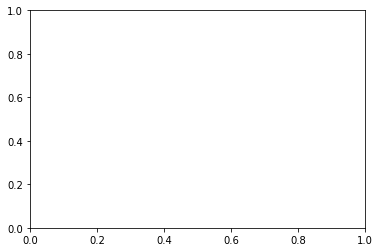

In [46]:
# Visualization
fig = plt.figure()
ax = fig.add_subplot()
fig.show()


In [47]:
class Particle:
    def __init__(self, bounds):
        self.particle_position = []  # particle position
        self.particle_velocity = []  # particle velocity
        self.local_best_particle_position = []  # best position of the particle
        self.fitness_local_best_particle_position = initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position = initial_fitness  # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(
                random.uniform(bounds[i][0], bounds[i][1]))  # generate random initial position
            self.particle_velocity.append(random.uniform(-1, 1))  # generate random initial velocity
 
    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
 
    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()
 
            cognitive_velocity = c1 * r1 * (self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2 * r2 * (global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w * self.particle_velocity[i] + cognitive_velocity + social_velocity
 
    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]


In [48]:
# ------------------------------------------------------------------------------
if mm == -1:
    initial_fitness = float("inf")  # for minimization problem
if mm == 1:
    initial_fitness = -float("inf")  # for maximization problem


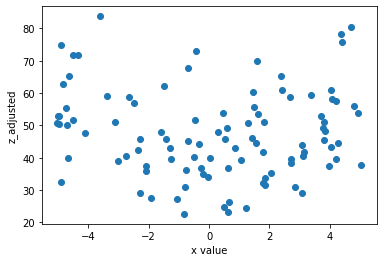

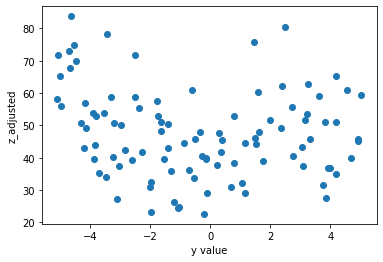

[[False, [], 0.1], [True, [0], 0], [False, [], 0.30000000000000004], [True, [1], 0.2], [False, [], 0.5], [True, [2], 0.4], [False, [], 0.7000000000000001], [True, [3], 0.6000000000000001], [False, [], 0.9], [True, [4], 0.8], [False, [], 1.1], [True, [5], 1.0], [False, [], 1.3], [True, [6], 1.2], [False, [], 1.5], [True, [7], 1.4], [False, [], 1.7], [True, [8], 1.5999999999999999], [False, [], 1.9], [True, [9], 1.7999999999999998], [False, [], 2.0999999999999996], [True, [10], 1.9999999999999998], [False, [], 2.3], [True, [11], 2.1999999999999997], [False, [], 2.5], [True, [12], 2.4], [False, [], 2.7], [True, [13], 2.6], [False, [], 2.9000000000000004], [True, [14], 2.8000000000000003], [False, [], 3.1000000000000005], [True, [15], 3.0000000000000004], [False, [], 3.3000000000000007], [True, [16], 3.2000000000000006], [False, [], 3.500000000000001], [True, [17], 3.400000000000001], [False, [], 3.700000000000001], [True, [18], 3.600000000000001], [False, [], 3.9000000000000012], [True, [

Numnber of 3d Collisions at iteration 23 are 0
Number of Collisions at iteration 24 are 0
Numnber of 3d Collisions at iteration 24 are 0
Number of Collisions at iteration 25 are 0
Numnber of 3d Collisions at iteration 25 are 0
Number of Collisions at iteration 26 are 0
Numnber of 3d Collisions at iteration 26 are 0
Number of Collisions at iteration 27 are 1
Numnber of 3d Collisions at iteration 27 are 0
Number of Collisions at iteration 28 are 0
Numnber of 3d Collisions at iteration 28 are 0
Number of Collisions at iteration 29 are 0
Numnber of 3d Collisions at iteration 29 are 0
Number of Collisions at iteration 30 are 0
Numnber of 3d Collisions at iteration 30 are 0
Number of Collisions at iteration 31 are 0
Numnber of 3d Collisions at iteration 31 are 0
Number of Collisions at iteration 32 are 0
Numnber of 3d Collisions at iteration 32 are 0
Number of Collisions at iteration 33 are 0
Numnber of 3d Collisions at iteration 33 are 0
Number of Collisions at iteration 34 are 0
Numnber of

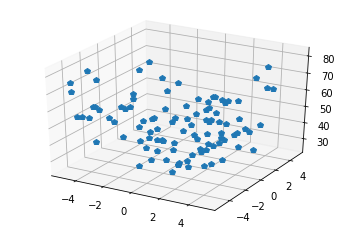

In [49]:
#------------------------
#added by arham

def shifter():
    index=0
    minimum_threshold= 0.0006

    z_array=[]
    for particle in swarm_particle:
        z_adjusted=z_objective_function(particle.particle_position,index,planes)
        if z_adjusted[0]<threshold:
            z_adjusted[1][1].remove(index)
            z_adjusted[1][0]=False
            for plane in reversed(planes):
                if plane[0]==False:
                    plane[0]=True
                    plane[1].append(index)
                    break
        z_array.append(z_adjusted)
        index=index+1
    return (z_array)
   # print("After shifting")        
   # print(planes)


# -----------------------------------------------------------------------------
fitness_global_best_particle_position = initial_fitness
global_best_particle_position = []
swarm_particle = []
for i in range(particle_size):
    swarm_particle.append(Particle(bounds))
A = []


all_z_adjusted_values = []
all_x_pos = []
all_y_pos = []
def compute_all_z_adjusted():
    index=0
    for particle in swarm_particle:
        z_adjusted=z_objective_function(particle.particle_position,index,planes)
        all_z_adjusted_values.append(z_adjusted[0])
        all_x_pos.append(particle.particle_position[0])
        all_y_pos.append(particle.particle_position[1])
        index=index+1

compute_all_z_adjusted()
plt.plot(all_x_pos,all_z_adjusted_values,marker='o', linestyle='none')


plt.xlabel('x value')
plt.ylabel('z_adjusted')
plt.show()

plt.plot(all_y_pos,all_z_adjusted_values,marker='o', linestyle='none')
plt.xlabel('y value')
plt.ylabel('z_adjusted')
plt.show()


fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.plot3D(all_x_pos, all_y_pos, all_z_adjusted_values,marker='p',linestyle='none')

 
    #added by arham
print(planes)

collisions=[]
collisions3d=[]

COL=pd.DataFrame()

for i in range(iterations):
    #added by arham
    z_adjusted=shifter()
    
    #added by P
    number_collisions = 0
    number_collisions_3d = 0
    for j1 in range(particle_size) :
        for j2 in range(particle_size) :
            if j1 >= j2 :
                continue
            
            def is_collision (position1, position2, threshold) :
                estimate = (position1 [0] - position2 [0]) ** 2 + (position1 [1] - position2 [1]) ** 2 
                if estimate - threshold <= epf :
                    return True
                return False

            if (is_collision (swarm_particle[j1].particle_position, swarm_particle [j2].particle_position, threshold)) :
                number_collisions += 1
                
            def is_collision_3d (position1, position2, z1, z2, threshold) :
                estimate = (position1 [0] - position2 [0]) ** 2 + (position1 [1] - position2 [1]) ** 2 +( z1 - z2 )**2
                if estimate - threshold <= epf :
                    return True
                return False    
            
            if (is_collision_3d (swarm_particle[j1].particle_position, swarm_particle [j2].particle_position, z_adjusted[j1][0],z_adjusted[j2][0], threshold)) :
                number_collisions_3d += 1
                
                
    print ('Number of Collisions at iteration',i,'are',number_collisions)
    collisions.append(number_collisions)
    print('Numnber of 3d Collisions at iteration',i,'are',number_collisions_3d)
    collisions3d.append(number_collisions_3d)
    

    for j in range(particle_size):
        swarm_particle[j].evaluate(objective_function)
 
        if mm == -1:
            if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                global_best_particle_position = list(swarm_particle[j].particle_position)
                fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
        if mm == 1:
            if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                global_best_particle_position = list(swarm_particle[j].particle_position)
                fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
    for j in range(particle_size):
        swarm_particle[j].update_velocity(global_best_particle_position)
        swarm_particle[j].update_position(bounds)
 
    A.append(fitness_global_best_particle_position)  # record the best fitness
 
    # Visualization
    # fig = plt.figure()
    # ax = fig.add_subplot()
    # ax.plot(A, color='r')
    # ax.set_xlim(left=max(0, i - iterations), right=i + 3)

COL['3d_collisions'] = collisions3d
COL['collisions'] = collisions
COL.to_csv("trial.csv")
#added by arham
print(planes)

print('Optimal solution:', global_best_particle_position)
print('Objective function value:', fitness_global_best_particle_position)
plt.show()

#number of occupied planes 
c=0
for plane in planes:
    if plane[0]==True:
        c=c+1



    

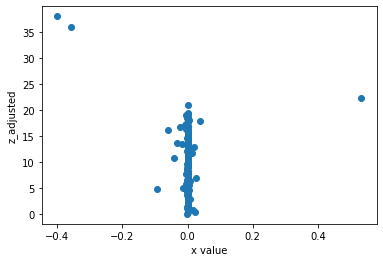

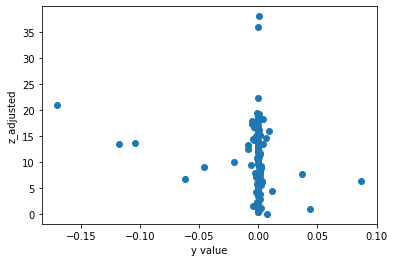

In [50]:
all_z_adjusted_values = []
all_x_pos = []
all_y_pos = []
def compute_all_z_adjusted():
    index=0
    for particle in swarm_particle:
        z_adjusted=z_objective_function(particle.particle_position,index,planes)
        all_z_adjusted_values.append(z_adjusted[0])
        all_x_pos.append(particle.particle_position[0])
        all_y_pos.append(particle.particle_position[1])
        index=index+1

compute_all_z_adjusted()
plt.plot(all_x_pos,all_z_adjusted_values,marker='o', linestyle='none')


plt.xlabel('x value')
plt.ylabel('z_adjusted')
plt.show()

plt.plot(all_y_pos,all_z_adjusted_values,marker='o', linestyle='none')
plt.xlabel('y value')
plt.ylabel('z_adjusted')
plt.show()



    


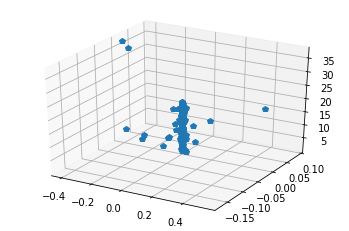

In [51]:

fig = plt.figure()
ax = plt.axes(projection='3d')


ax.plot3D(all_x_pos, all_y_pos, all_z_adjusted_values,marker='p',linestyle='none')



